# **Imization-techniques-deep-learning**

#Optimization Techniques Deep Learning
Optimization Techniques Theory 1

Optimization Techniques Theory 2

Optimizers from Scratch in Python

Keras Optimizers Documentation

Optimizers in Neural Networks - EXPLAINED! Video


Implementing all the optimizers commonly used in deep learning

Optimizers: ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta”, ‘Nadam']

-> Stochastic Gradient Descent (SGD)

-> Adam

-> RMSprop

-> Adagrad

-> Adadelta

-> Nadam

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with SGD...
Training with Adam...
Training with RMSprop...
Training with Adagrad...
Training with Adadelta...
Training with Nadam...


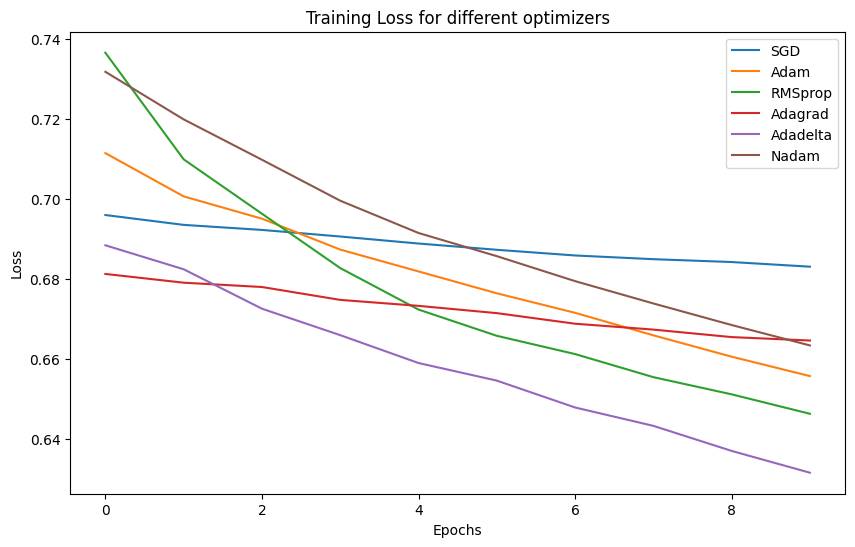

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam

X = np.random.randn(100, 5)
y = np.random.randint(0, 2, size=(100, 1))

def create_model(optimizer):
    model = Sequential()
    model.add(Dense(64, input_dim=5, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

optimizers = [
    SGD(learning_rate=0.01),
    Adam(learning_rate=0.001),
    RMSprop(learning_rate=0.001),
    Adagrad(learning_rate=0.01),
    Adadelta(learning_rate=1.0),
    Nadam(learning_rate=0.001)
]
optimizer_names = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Nadam']
history_dict = {}

for optimizer in optimizers:
    model = create_model(optimizer)
    print(f"Training with {optimizer.__class__.__name__}...")

    history = model.fit(X, y, epochs=10, batch_size=32, verbose=0)
    history_dict[optimizer.__class__.__name__] = history.history['loss']

plt.figure(figsize=(10, 6))

for optimizer_name, loss in history_dict.items():
    plt.plot(loss, label=optimizer_name)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for different optimizers')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


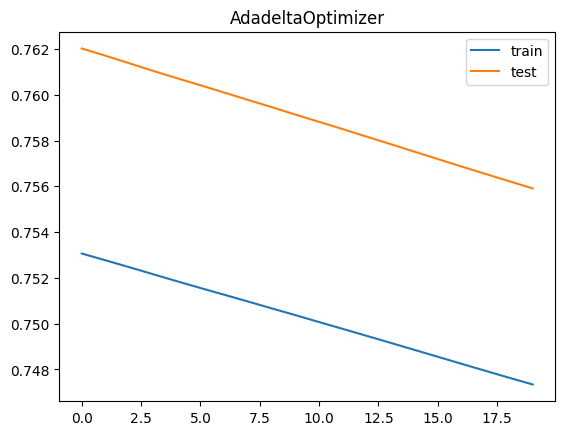

Train Loss                     Train Accuracy
[0.7471882700920105, 0.5063999891281128]
Test Loss                      Test Accuracy
[0.755908727645874, 0.49880000948905945]



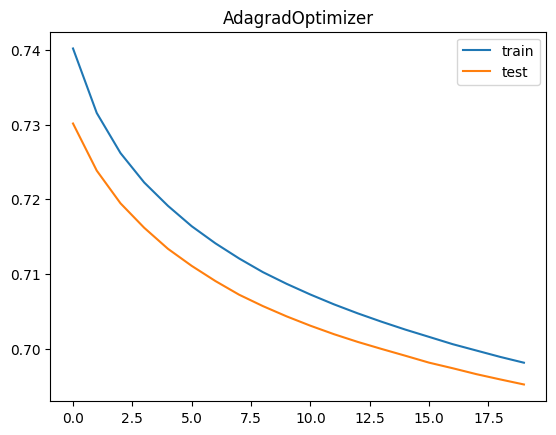

Train Loss                     Train Accuracy
[0.6976525783538818, 0.508400022983551]
Test Loss                      Test Accuracy
[0.6951811909675598, 0.5203999876976013]



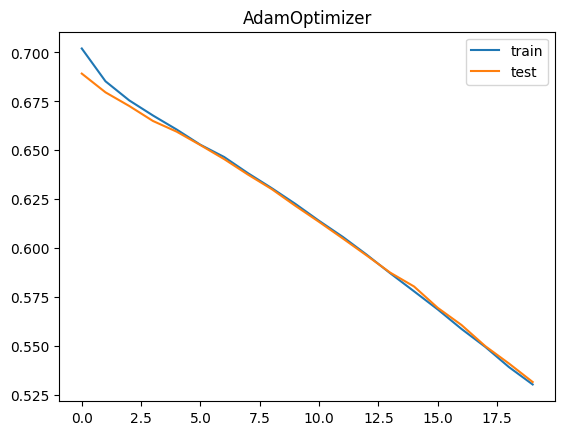

Train Loss                     Train Accuracy
[0.5239414572715759, 0.8356000185012817]
Test Loss                      Test Accuracy
[0.5316081047058105, 0.8203999996185303]



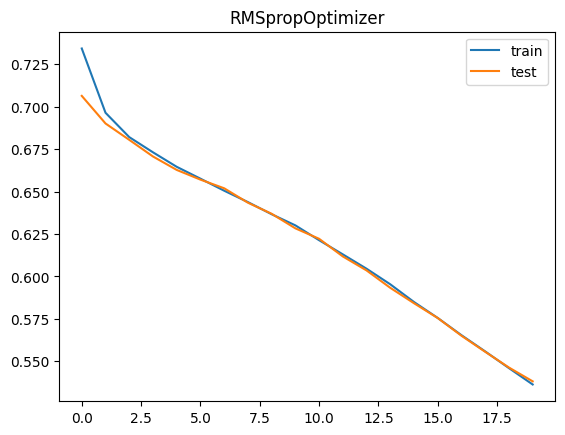

Train Loss                     Train Accuracy
[0.5302415490150452, 0.83160001039505]
Test Loss                      Test Accuracy
[0.5381875038146973, 0.8136000037193298]



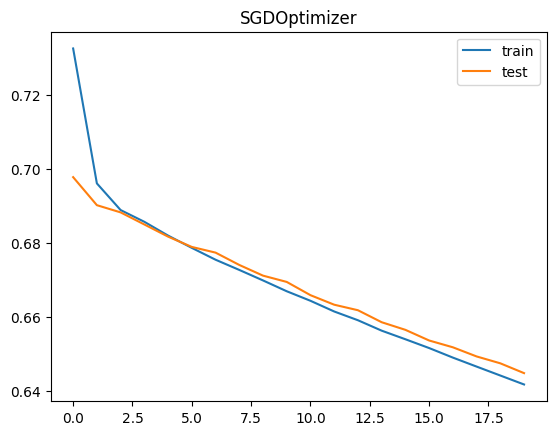

Train Loss                     Train Accuracy
[0.6399449110031128, 0.642799973487854]
Test Loss                      Test Accuracy
[0.64482182264328, 0.6355999708175659]



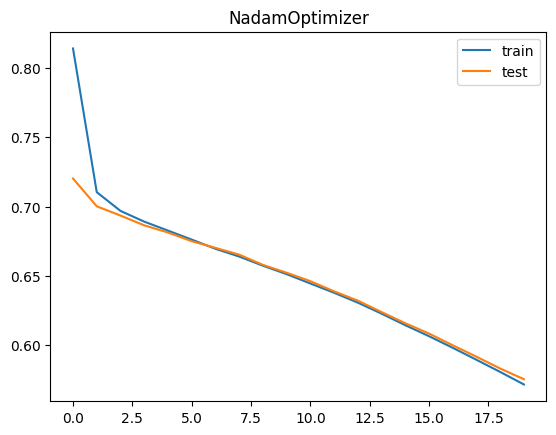

Train Loss                     Train Accuracy
[0.5664691925048828, 0.7991999983787537]
Test Loss                      Test Accuracy
[0.575534462928772, 0.7932000160217285]



In [2]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

X,y = make_circles(n_samples=5000, noise=0.1, random_state=1)
train1 = 2500
trainX, testX = X[:train1,:],X[train1:,:]
trainy, texty = y[:train1],y[train1:]

def build_model(optimizer):
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

optimizer = ['Adadelta','Adagrad','Adam','RMSprop','SGD','Nadam']

for i in optimizer:
  model = build_model(i)
  history = model.fit(trainX, trainy, validation_data=(testX, texty), epochs=20, verbose=0)
  train_acc = model.evaluate(trainX, trainy, verbose=0)
  test_acc = model.evaluate(testX, texty, verbose=0)
  pyplot.title(i+'Optimizer')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()
  print("Train Loss                     Train Accuracy")
  print(train_acc)
  print("Test Loss                      Test Accuracy")
  print(test_acc)
  print()

# **Optimizers With Breast Cancer Dataset**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with SGD...
Training with Adam...
Training with RMSprop...
Training with Adagrad...
Training with Adadelta...
Training with Nadam...


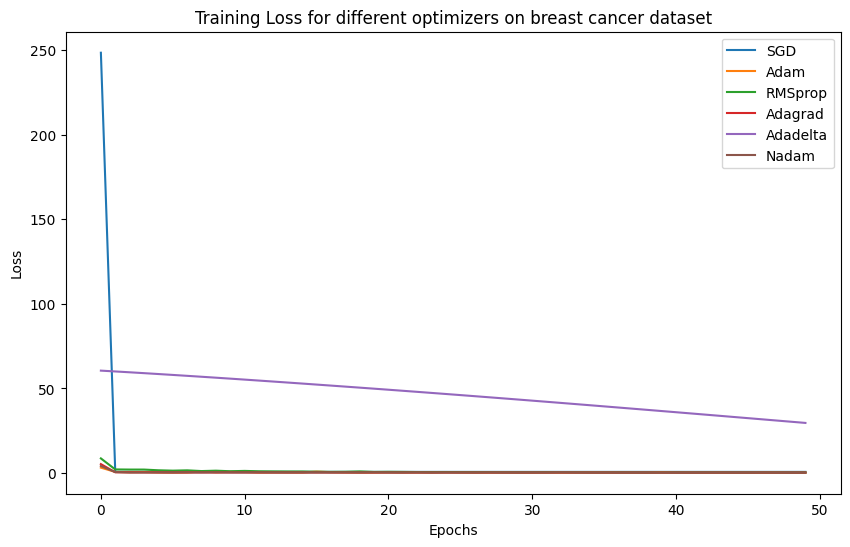

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9558 - loss: 0.0982  
Final Test Accuracy: 95.32%


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data for binary classification
X_binary = X[y != 2]
y_binary = y[y != 2]

# Encode the target
label_binarizer = LabelBinarizer()
y_binary_encoded = label_binarizer.fit_transform(y_binary)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Model creation function
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(64, input_dim=30, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# List of optimizers
optimizers = [SGD(), Adam(), RMSprop(), Adagrad(), Adadelta(), Nadam()]
history_dict = {}

# Training with each optimizer
for optimizer in optimizers:
    model = create_model(optimizer)  # Create a new model with a fresh optimizer instance
    print(f"Training with {optimizer.__class__.__name__}...")

    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    history_dict[optimizer.__class__.__name__] = history.history['loss']

# Plotting the loss for each optimizer
plt.figure(figsize=(10, 6))

for optimizer_name, loss in history_dict.items():
    plt.plot(loss, label=optimizer_name)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for different optimizers on breast cancer dataset')
plt.legend()
plt.show()

# Training and evaluation with the best optimizer
best_optimizer = Adam(learning_rate=0.001)
best_model = create_model(best_optimizer)
best_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")
